In [1]:
from openpiv import windef
from openpiv import tools, scaling, validation, filters, preprocess, pyprocess as process
import numpy as np
import os
from time import time
import warnings

import matplotlib.pyplot as plt

In [2]:
'A more detailed scipt can be seen in the window_deformation notebook.'
settings = windef.Settings()

'Data related settings'
# Folder with the images to process
settings.filepath_images = '../test15/'
# Folder for the outputs
settings.save_path = '../test15/'
# Root name of the output Folder for Result Files
settings.save_folder_suffix = 'Test_15'
# Format and Image Sequence
settings.frame_pattern_a = '../test15/synt00_a.pgm'
settings.frame_pattern_b = '../test15/synt00_b.pgm'

'Processing Parameters'
settings.deformation_method = 'second image'
settings.correlation_method='circular'  # 'circular' or 'linear'
settings.normalized_correlation=False
settings.num_iterations = 3  # select the number of PIV passes
# rectangular windows are arrange as [y,x], scalars are assumed to be square windows
settings.windowsizes = ([16,96], [16,64], 32)
settings.overlap = ([8,72], [8,32], 16)
settings.subpixel_method = 'gaussian'
settings.use_vectorized = True
settings.interpolation_order = 3

'Validation Parameters'
settings.validation_first_pass = True
settings.median_threshold = 5  # threshold of the median validation
settings.median_size=1 #defines the size of the local median
settings.sig2noise_method = 'peak2peak'
settings.sig2noise_mask = 2
settings.sig2noise_threshold = 1

'Outlier replacement or Smoothing options'
settings.replace_vectors = True # Enable the replacment. Chosse: True or False
settings.smoothn=True #Enables smoothing of the displacemenet field
settings.smoothn_p=0.5 # This is a smoothing parameter
settings.filter_method = 'localmean'
settings.max_filter_iteration = 4
settings.filter_kernel_size = 2  # kernel size for the localmean method

'Output options'
settings.show_plot = True
settings.save_plot = False
settings.scale_plot = 500  # select a value to scale the quiver plot of the vectorfield


Found 0 bad peak(s)
Found 0 bad peak(s)
Found 1 bad peak(s)


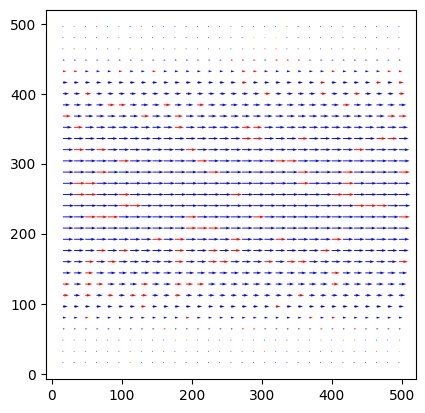

Image Pair 1
synt00_a.pgm synt00_b.pgm


In [3]:
windef.piv(settings)

Mean peak-to-peak ratio: 2.5453367014155823


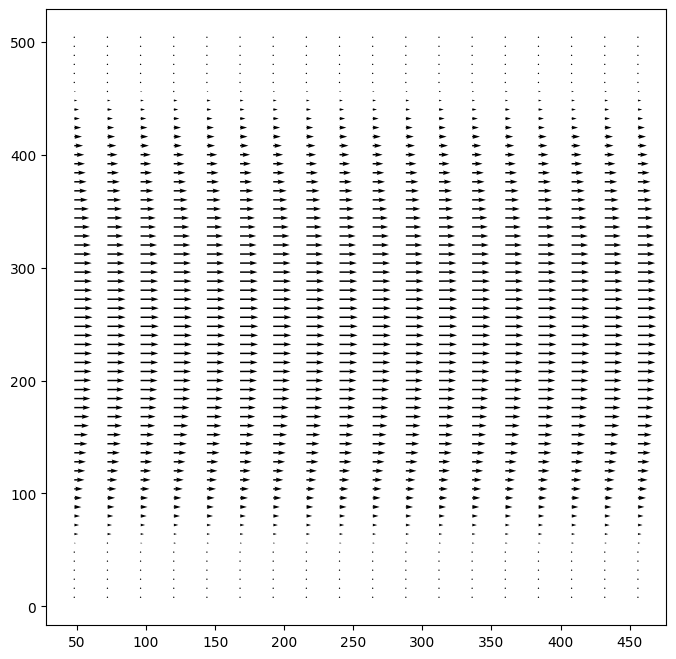

In [4]:
# we can run it from any folder
path = settings.filepath_images

frame_a  = tools.imread( os.path.join(path,settings.frame_pattern_a)).astype(np.int32)
frame_b  = tools.imread( os.path.join(path,settings.frame_pattern_b)).astype(np.int32)


window_size = [16,96]
overlap = [8,72] # [50%, 75%] overlap

u, v, sig2noise = process.extended_search_area_piv( frame_a, frame_b, \
    window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size, sig2noise_method='peak2peak' )
print(f'Mean peak-to-peak ratio: {np.nanmean(sig2noise)}')

x, y = process.get_rect_coordinates(frame_a.shape, 
                                    window_size, 
                                    overlap)

#u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
#u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
#x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1)
x, y, u, v = tools.transform_coordinates(x, y, u, v)

#tools.save(x, y, u, v, mask, 'test1.vec' )
#tools.display_vector_field('test1.vec', scale=75, width=0.0035);
plt.figure(figsize = (8,8))
plt.quiver(x,y,u,v)
plt.show()